In [448]:
#-------------------------- import packages --------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

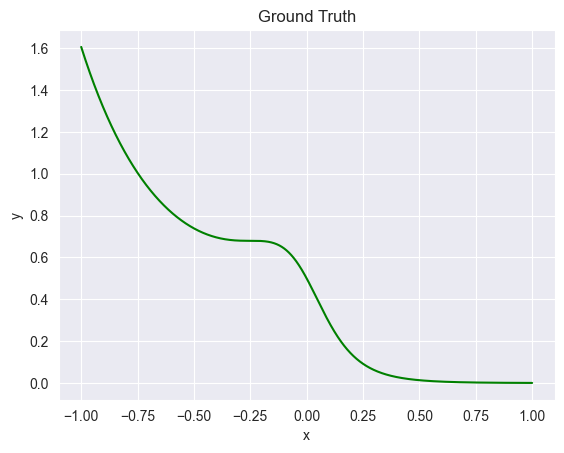

In [449]:
#-------------------------- generate function --------------------------
X = np.linspace(-1, 1, 10000)
y = np.exp(-4*X) /(2* (1 + 16*X**2))

#-------------------------- plot --------------------------
# Ground truth
plt.plot(X, y, color = 'green')
plt.title('Ground Truth')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [450]:
#-------------------------- generate data features --------------------------
np.random.seed(0)
num_vars = 10 # number of variables to generate
num_samples = 20_000 # number of observations
cat_vars = {"X4": 3, "X7": 10} # name and number of categories
variables = {}
for i in range(1, num_vars + 1):
    
    # continuous variables
    if f"X{i}" not in cat_vars.keys():
        variables[f'X{i}'] = np.random.uniform(-1, 1, num_samples)
    
    # categorical variables
    else:
        variables[f'X{i}'] = np.random.randint(0, cat_vars[f"X{i}"], num_samples)

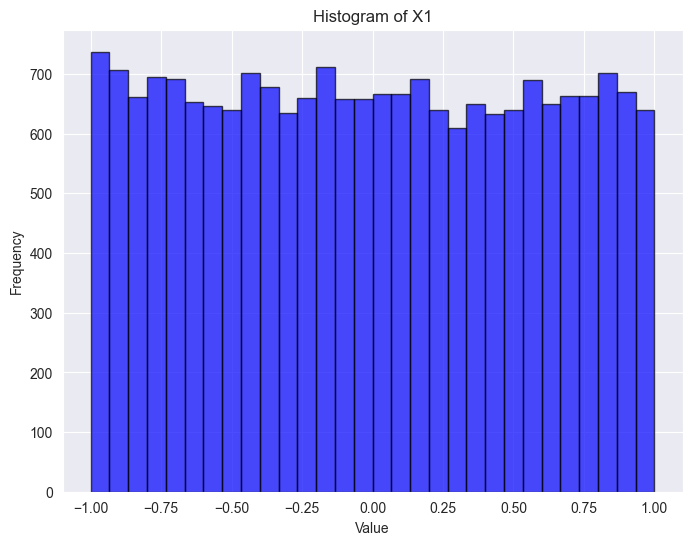

In [451]:
#-------------------------- check numeric --------------------------
plt.figure(figsize = (8, 6))
plt.hist(variables["X1"], bins = 30, color = 'blue', alpha = 0.7, edgecolor = 'black')
plt.title('Histogram of X1')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

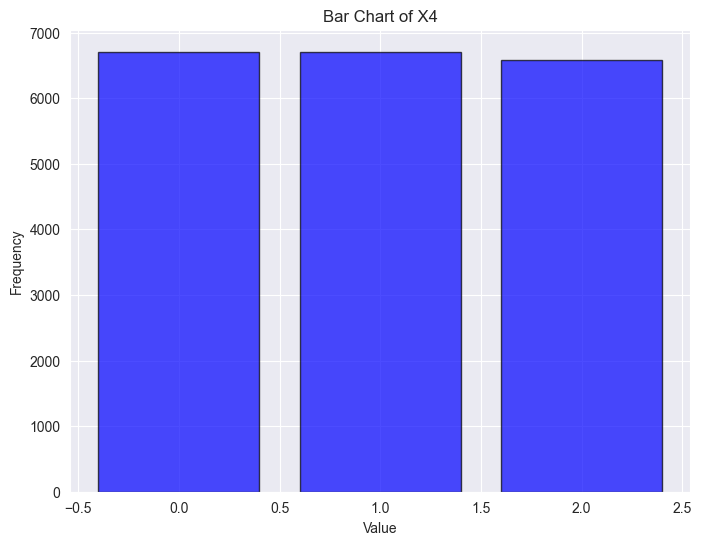

In [452]:
#-------------------------- check categorical --------------------------
# Get the distinct values and their frequencies
values, counts = np.unique(variables["X4"], return_counts=True)

plt.figure(figsize=(8, 6))
plt.bar(values, counts, color='blue', alpha=0.7, edgecolor='black')

# Add titles and labels
plt.title('Bar Chart of X4')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True, axis='y')  # Add gridlines along the y-axis
plt.show()

In [453]:
#-------------------------- define functions to calculate main and pairwise interaction effect --------------------------

# main effect
def main_effect(var_name, var_values):
    if var_name == "X1":
        return np.exp(-4*var_values) /((1 + 16*var_values**2))
    elif var_name == "X2":
        return 1/2*np.sin(8*var_values)**3 - np.cos(4*var_values)/4 + (var_values**2)/4
    elif var_name == "X3":
        return np.abs(var_values) * np.sin(8 * var_values)
    elif var_name == "X4":
        return np.where(var_values == 0, 1, np.where(var_values == 1, -0.75, 0.25))

# pairwise interaction
def interaction_effect(var_name, var1, var2):
    if var_name == "f12":
        return 0.5 * var1 * np.exp(-var2)
    elif var_name == "f23":
        return 2 * np.exp(-2 * var1**2 - (12 * var1**2 + 10 * var2**2 - 5)**2)
    elif var_name == "f56":
        return 2 * np.sin(4*np.pi * var1 * var2)

### Main Effects:

1. $ f_1(X_1) $:
$$
f_1(X_1) = \frac{e^{-4X_1}}{1 + 16X_1^2}
$$

2. $ f_2(X_2) $:
$$
f_2(X_2) = \frac{1}{2}\sin^3(8X_2) - \frac{\cos(4X_2)}{4} + \frac{X_3^2}{4}
$$

3. $ f_3(X_3) $:
$$
f_3(X_3) = |X_3| \sin(8X_3)
$$

4. $ f_4(X_4)  $:
$$
f_4(X_4)  = 
\begin{cases} 
1 & \text{if } X_5 = 0 \\
-0.75 & \text{if } X_5 = 1 \\
0.25 & \text{if } X_5 = 2 \\
\end{cases}
$$

### Pairwise Interaction Effects:

1. $ f_{12}(X_1, X_2) $:
$$
f_{12}(X_1, X_2) = \frac{X_1 e^{-X_2}}{2}
$$

2. $ f_{24}(X_2, X_3) $:
$$
f_{23}(X_2, X_3) = 2 \exp\left(-2 X_2^2 - \left(12X_2^2 + 10X_3^2 - 5 \right)^2 \right)
$$

3. $ f_{56}(X_5, X_6) $:
$$
f_{56}(X_5, X_6) = 2\sin(\pi X_5X_6)
$$

In [454]:
#-------------------------- generate mean response --------------------------
effect = {}

# Main effects
for i in range(1, 5):
    effect[f"f{i}"] = main_effect(f"X{i}", variables[f"X{i}"])

# Interaction effects
effect["f12"] = interaction_effect("f12", variables["X1"], variables["X2"])
effect["f23"] = interaction_effect("f23", variables["X2"], variables["X3"])
effect["f56"] = interaction_effect("f56", variables["X5"], variables["X6"])

# Calculate mu - the log of the mean response
mu = 4.5 + sum(effect.values())

Text(0.5, 1.0, 'Distribution of Log(E(Y|X))')

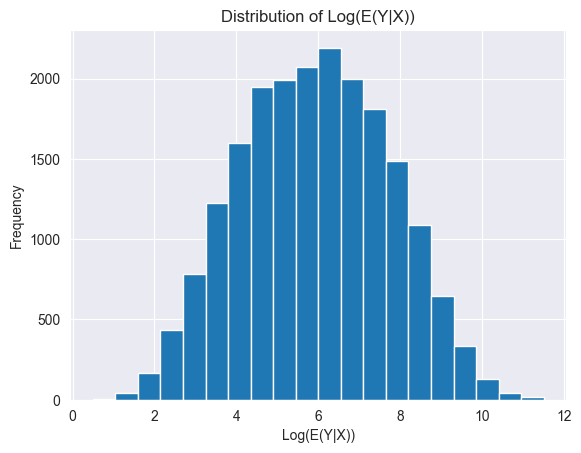

In [455]:
#-------------------------- mean response distribution --------------------------
plt.hist(mu, bins = 20)
plt.xlabel("Log(E(Y|X))")
plt.ylabel("Frequency")
plt.title("Distribution of Log(E(Y|X))")

In [456]:
#-------------------------- check min/mean/max of mu --------------------------
print(f"Min of mu: {np.min(mu)}")
print(f"Mean of mu: {np.mean(mu)}")
print(f"Max of mu: {np.max(mu)}")

Min of mu: 0.4956436354804179
Mean of mu: 5.924682368445808
Max of mu: 11.50741756207498


In [457]:
#-------------------------- check min/mean/max of exp(mu) --------------------------
print(f"Min of exp(mu): {np.exp(np.min(mu))}")
print(f"Mean of exp(mu): {np.exp(np.mean(mu))}")
print(f"Max of exp(mu): {np.exp(np.max(mu))}")

Min of exp(mu): 1.6415544618040185
Mean of exp(mu): 374.159571597588
Max of exp(mu): 99450.72377913391


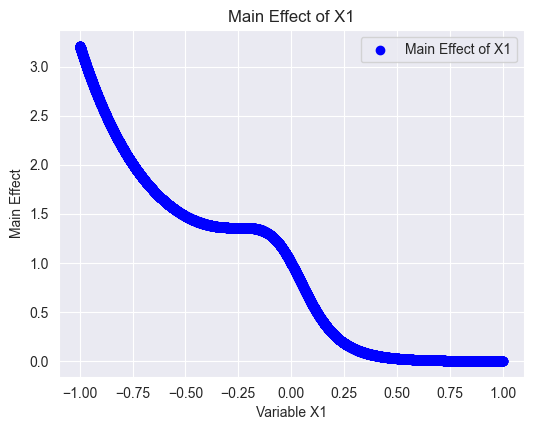

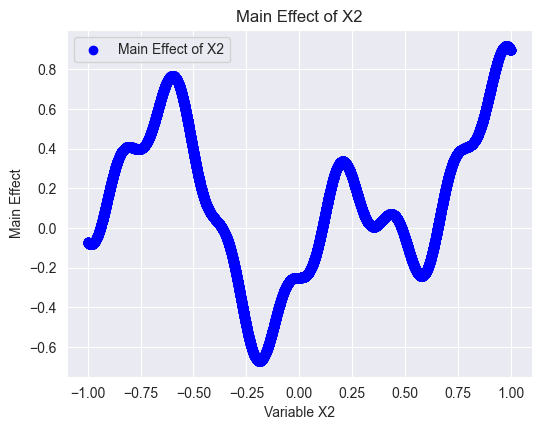

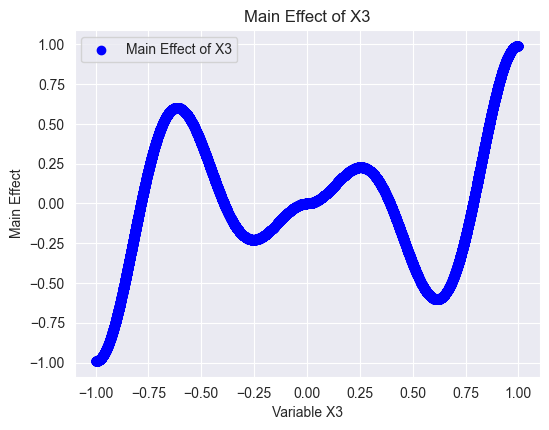

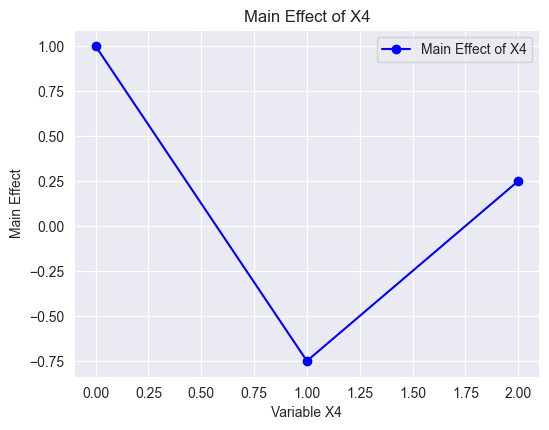

In [458]:
#-------------------------- plot functions for main effect --------------------------
for i in range(1,len(variables) + 1):
    
    if i <= 4:
        var = f"X{i}"
        values = variables[var]  # get the values for the current variable
        
        # Calculate the main effect
        effect = main_effect(var, values)
        
        # Create the plot
        plt.figure(figsize=(6, 4.5))
        
        # Check if the variable is categorical (X5), use line plot
        if var in ["X4"]:
            unique_vals = np.unique(values)
            mean_effects = [np.mean(effect[values == val]) for val in unique_vals]
            plt.plot(unique_vals, mean_effects, marker='o', color='blue', label=f'Main Effect of {var}', linestyle='-')
        else:
            plt.scatter(values, effect, color='blue', label=f'Main Effect of {var}')
        
        # Add labels and title
        plt.xlabel(f'Variable {var}')
        plt.ylabel('Main Effect')
        plt.title(f'Main Effect of {var}')
        plt.legend()
        plt.grid(True)
        
        # Show the plot
        plt.show()

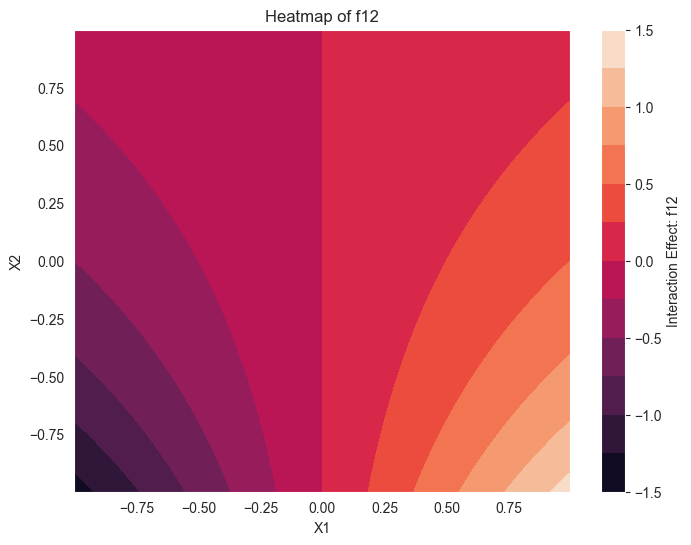

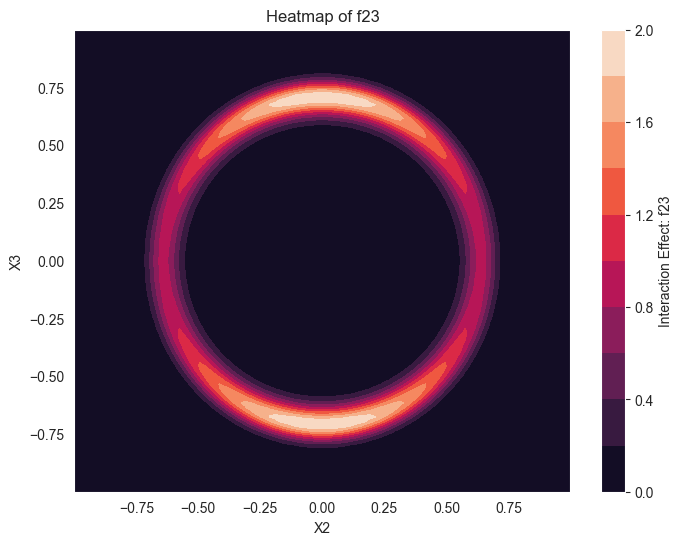

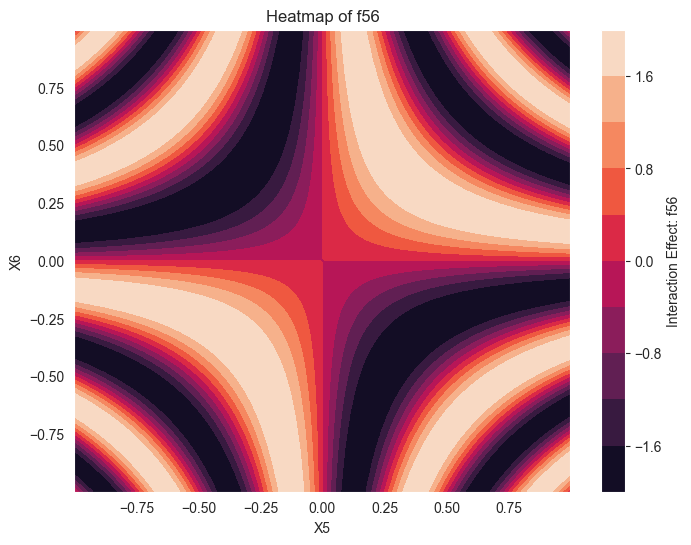

In [459]:
#-------------------------- plot the pairwise interaction effect --------------------------
# Interaction plots for f16, f34, f35, and f89
interaction_pairs = {
    "f12": ("X1", "X2"),
    "f23": ("X2", "X3"),
    "f56": ("X5", "X6")
}

# Loop through each interaction effect and plot the heatmap
for interaction, (var1, var2) in interaction_pairs.items():
    x1 = variables[var1]
    x2 = variables[var2]
    
    # Create a meshgrid for plotting
    X1, X2 = np.meshgrid(np.linspace(x1.min(), x1.max(), 100), np.linspace(x2.min(), x2.max(), 100))
    
    # Calculate the interaction effect using the defined function
    if interaction == "f12":
        Y = 0.5 * X1 * np.exp(-X2)
    elif interaction == "f23":
        Y = 2 * np.exp(-2 * X1**2 - (12 * X1**2 + 10 * X2**2 - 5)**2)
    elif interaction == "f56":
        Y = 2 * np.sin(4*np.pi * X1 * X2)

    # Create the heatmap
    plt.figure(figsize=(8, 6))
    plt.contourf(X1, X2, Y, levels = 10)
    plt.colorbar(label=f'Interaction Effect: {interaction}')
    plt.title(f'Heatmap of {interaction}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.show()

In [460]:
#-------------------------- generate target variables --------------------------

data = pd.DataFrame(variables)

'assume a Gamma distribution with mean = exp(mu)'
phi_low = 1 # dispersion for low variance distribution
phi_high = 5 # dispersion for low variance distribution

# for low variance
response_low = np.random.gamma(shape = 1/phi_low, scale = phi_low*np.exp(mu))
data_low = data.copy()
data_low["Y"] = response_low

# for high variance
response_high = np.random.gamma(shape = 1/phi_high, scale = phi_high*np.exp(mu))
data_high = data.copy()
data_high["Y"] = response_high

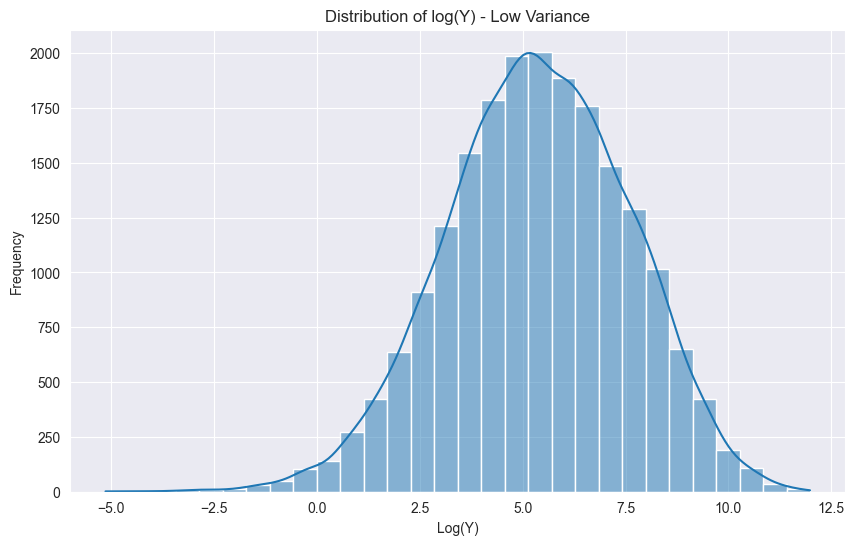

In [461]:
#-------------------------- distribution of log(response) - low variance --------------------------
plt.figure(figsize = (10, 6)) # set the size of the figure
sns.set_style("darkgrid")
sns.histplot(np.log(data_low['Y']), bins = 30, kde = True) # draw the chart
plt.title('Distribution of log(Y) - Low Variance')
plt.xlabel('Log(Y)')
plt.ylabel('Frequency')
plt.tick_params(axis = 'x')
plt.tick_params(axis = 'y')
plt.grid(True)
plt.show()

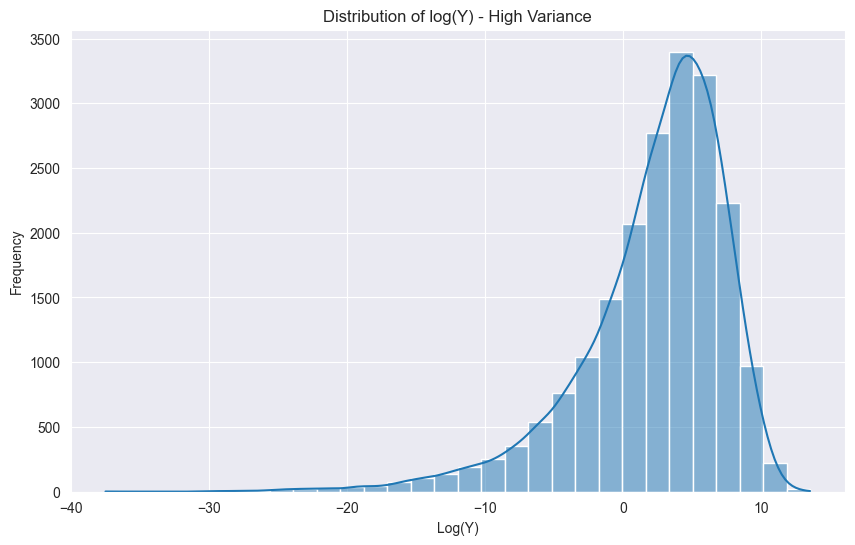

In [462]:
#-------------------------- distribution of log(response) - high variance --------------------------
plt.figure(figsize = (10, 6)) # set the size of the figure
sns.set_style("darkgrid")
sns.histplot(np.log(data_high['Y']), bins = 30, kde = True) # draw the chart
plt.title('Distribution of log(Y) - High Variance')
plt.xlabel('Log(Y)')
plt.ylabel('Frequency')
plt.tick_params(axis = 'x')
plt.tick_params(axis = 'y')
plt.grid(True)
plt.show()

In [463]:
#-------------------------- export data --------------------------
data_low.to_csv("synthetic_low_var.csv", index = False)
data_high.to_csv("synthetic_high_var.csv", index = False)